<a href="https://colab.research.google.com/github/simsekergun/Qc_study/blob/main/Extrapolation_Qc_with_FCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install gputil
!pip install psutil
!pip install humanize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for gputil: filename=GPUtil-1.4.0-py3-none-any.whl size=7411 sha256=06f564575962cefca3b724cfff9faee67db1eecfa42d24c041050123ef24110d
  Stored in directory: /root/.cache/pip/wheels/6e/f8/83/534c52482d6da64622ddbf72cd93c35d2ef2881b78fd08ff0c
Successfully built gputil
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!git clone https://github.com/simsekergun/Qc_datasets_functions.git
%run ./Qc_datasets_functions/Attention.py

Cloning into 'Qc_datasets_functions'...
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 11 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (11/11), done.


/content/Qc_datasets_functions/Attention.py:1: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [3]:
Qc_Dataset = torch.load('./Qc_datasets_functions/Qc_3680_230.pt')
Qc_Dataset.shape

torch.Size([5750, 605])

In [4]:
Qctrain = torch.narrow(Qc_Dataset, 0, 0, 3680)
Qctest = torch.narrow(Qc_Dataset, 0, 3680, 230)

In [5]:
class FC_Dataset_partial(Dataset):
    def __init__(self, dataset, n1=300, n2 = 440):
        self.dataset = dataset
        self.n1 = n1
        self.n2 = n2

    def __len__(self):
        return self.dataset.shape[0]

    def __getitem__(self, idx):
        x = self.dataset[:, :self.n1]
        y = self.dataset[:, self.n2:]
        x = x.__getitem__(idx)
        y = y.__getitem__(idx)
        return x, y

In [6]:
train_data, null_data = torch.utils.data.random_split(FC_Dataset_partial(dataset=Qctrain,n1=400, n2 = 440), (Qctrain.shape[0], 0)) 
null_data, test_data = torch.utils.data.random_split(FC_Dataset_partial(dataset=Qctest,n1=400, n2 = 440), (0, Qctest.shape[0])) 

In [7]:
# Loading the data through DataLoader:
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

In [8]:
# Defining a neural network:

num_features = train_data[0][0].shape[0]
num_targets = train_data[0][1].shape[0]
num_neurons = 512

activ = 'ReLU'

# del fc_model_1
fc_model_1 = nn.Sequential(
    getLayer(num_features, num_neurons, activation=activ),
    getLayer(num_neurons, num_neurons, activation=activ),
    getLayer(num_neurons, 2*num_neurons, activation=activ),
    getLayer(2*num_neurons, 2*num_neurons, activation=activ),
    getLayer(2*num_neurons, 4*num_neurons, activation=activ),
    getLayer(4*num_neurons, 4*num_neurons, activation=activ),
    nn.Linear(4*num_neurons, num_targets),
)

eta = 0.001
loss_func = nn.MSELoss()
optimizer = torch.optim.AdamW(fc_model_1.parameters(), lr=eta)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 10, gamma=0.3)

In [9]:
num_features, num_targets

(400, 165)

In [10]:
# Execute function
mem_report()

CPU RAM Free: 12.5 GB
GPU 0 ... Mem Free: 15106MB / 15109MB | Utilization   0%


In [11]:
# training the fully connected model
start = time.time()
fc_1_results = train_network_reg(fc_model_1, loss_func, train_loader, test_loader=test_loader, epochs=100, score_funcs={'R^2 score': r2_score}, 
                                device=device, optimizer=optimizer, lr_schedule=scheduler)
stop = time.time()

Epoch:   0%|          | 0/100 [00:00<?, ?it/s]

Training:   0%|          | 0/115 [00:00<?, ?it/s]

Testing:   0%|          | 0/65 [00:00<?, ?it/s]

Training:   0%|          | 0/115 [00:00<?, ?it/s]

Testing:   0%|          | 0/65 [00:00<?, ?it/s]

Training:   0%|          | 0/115 [00:00<?, ?it/s]

Testing:   0%|          | 0/65 [00:00<?, ?it/s]

Training:   0%|          | 0/115 [00:00<?, ?it/s]

Testing:   0%|          | 0/65 [00:00<?, ?it/s]

Training:   0%|          | 0/115 [00:00<?, ?it/s]

Testing:   0%|          | 0/65 [00:00<?, ?it/s]

Training:   0%|          | 0/115 [00:00<?, ?it/s]

Testing:   0%|          | 0/65 [00:00<?, ?it/s]

Training:   0%|          | 0/115 [00:00<?, ?it/s]

Testing:   0%|          | 0/65 [00:00<?, ?it/s]

Training:   0%|          | 0/115 [00:00<?, ?it/s]

Testing:   0%|          | 0/65 [00:00<?, ?it/s]

Training:   0%|          | 0/115 [00:00<?, ?it/s]

Testing:   0%|          | 0/65 [00:00<?, ?it/s]

Training:   0%|          | 0/115 [00:00<?, ?it/s]

Testing:   0%|          | 0/65 [00:00<?, ?it/s]

Training:   0%|          | 0/115 [00:00<?, ?it/s]

Testing:   0%|          | 0/65 [00:00<?, ?it/s]

Training:   0%|          | 0/115 [00:00<?, ?it/s]

Testing:   0%|          | 0/65 [00:00<?, ?it/s]

Training:   0%|          | 0/115 [00:00<?, ?it/s]

Testing:   0%|          | 0/65 [00:00<?, ?it/s]

Training:   0%|          | 0/115 [00:00<?, ?it/s]

Testing:   0%|          | 0/65 [00:00<?, ?it/s]

Training:   0%|          | 0/115 [00:00<?, ?it/s]

Testing:   0%|          | 0/65 [00:00<?, ?it/s]

Training:   0%|          | 0/115 [00:00<?, ?it/s]

Testing:   0%|          | 0/65 [00:00<?, ?it/s]

Training:   0%|          | 0/115 [00:00<?, ?it/s]

Testing:   0%|          | 0/65 [00:00<?, ?it/s]

Training:   0%|          | 0/115 [00:00<?, ?it/s]

Testing:   0%|          | 0/65 [00:00<?, ?it/s]

Training:   0%|          | 0/115 [00:00<?, ?it/s]

Testing:   0%|          | 0/65 [00:00<?, ?it/s]

Training:   0%|          | 0/115 [00:00<?, ?it/s]

Testing:   0%|          | 0/65 [00:00<?, ?it/s]

Training:   0%|          | 0/115 [00:00<?, ?it/s]

Testing:   0%|          | 0/65 [00:00<?, ?it/s]

Training:   0%|          | 0/115 [00:00<?, ?it/s]

Testing:   0%|          | 0/65 [00:00<?, ?it/s]

Training:   0%|          | 0/115 [00:00<?, ?it/s]

Testing:   0%|          | 0/65 [00:00<?, ?it/s]

Training:   0%|          | 0/115 [00:00<?, ?it/s]

Testing:   0%|          | 0/65 [00:00<?, ?it/s]

Training:   0%|          | 0/115 [00:00<?, ?it/s]

Testing:   0%|          | 0/65 [00:00<?, ?it/s]

Training:   0%|          | 0/115 [00:00<?, ?it/s]

Testing:   0%|          | 0/65 [00:00<?, ?it/s]

Training:   0%|          | 0/115 [00:00<?, ?it/s]

Testing:   0%|          | 0/65 [00:00<?, ?it/s]

Training:   0%|          | 0/115 [00:00<?, ?it/s]

Testing:   0%|          | 0/65 [00:00<?, ?it/s]

Training:   0%|          | 0/115 [00:00<?, ?it/s]

Testing:   0%|          | 0/65 [00:00<?, ?it/s]

Training:   0%|          | 0/115 [00:00<?, ?it/s]

Testing:   0%|          | 0/65 [00:00<?, ?it/s]

Training:   0%|          | 0/115 [00:00<?, ?it/s]

Testing:   0%|          | 0/65 [00:00<?, ?it/s]

Training:   0%|          | 0/115 [00:00<?, ?it/s]

Testing:   0%|          | 0/65 [00:00<?, ?it/s]

Training:   0%|          | 0/115 [00:00<?, ?it/s]

Testing:   0%|          | 0/65 [00:00<?, ?it/s]

Training:   0%|          | 0/115 [00:00<?, ?it/s]

Testing:   0%|          | 0/65 [00:00<?, ?it/s]

Training:   0%|          | 0/115 [00:00<?, ?it/s]

Testing:   0%|          | 0/65 [00:00<?, ?it/s]

Training:   0%|          | 0/115 [00:00<?, ?it/s]

Testing:   0%|          | 0/65 [00:00<?, ?it/s]

Training:   0%|          | 0/115 [00:00<?, ?it/s]

Testing:   0%|          | 0/65 [00:00<?, ?it/s]

Training:   0%|          | 0/115 [00:00<?, ?it/s]

Testing:   0%|          | 0/65 [00:00<?, ?it/s]

Training:   0%|          | 0/115 [00:00<?, ?it/s]

Testing:   0%|          | 0/65 [00:00<?, ?it/s]

Training:   0%|          | 0/115 [00:00<?, ?it/s]

Testing:   0%|          | 0/65 [00:00<?, ?it/s]

Training:   0%|          | 0/115 [00:00<?, ?it/s]

Testing:   0%|          | 0/65 [00:00<?, ?it/s]

Training:   0%|          | 0/115 [00:00<?, ?it/s]

Testing:   0%|          | 0/65 [00:00<?, ?it/s]

Training:   0%|          | 0/115 [00:00<?, ?it/s]

Testing:   0%|          | 0/65 [00:00<?, ?it/s]

Training:   0%|          | 0/115 [00:00<?, ?it/s]

Testing:   0%|          | 0/65 [00:00<?, ?it/s]

Training:   0%|          | 0/115 [00:00<?, ?it/s]

Testing:   0%|          | 0/65 [00:00<?, ?it/s]

Training:   0%|          | 0/115 [00:00<?, ?it/s]

Testing:   0%|          | 0/65 [00:00<?, ?it/s]

Training:   0%|          | 0/115 [00:00<?, ?it/s]

Testing:   0%|          | 0/65 [00:00<?, ?it/s]

Training:   0%|          | 0/115 [00:00<?, ?it/s]

Testing:   0%|          | 0/65 [00:00<?, ?it/s]

Training:   0%|          | 0/115 [00:00<?, ?it/s]

Testing:   0%|          | 0/65 [00:00<?, ?it/s]

Training:   0%|          | 0/115 [00:00<?, ?it/s]

Testing:   0%|          | 0/65 [00:00<?, ?it/s]

Training:   0%|          | 0/115 [00:00<?, ?it/s]

Testing:   0%|          | 0/65 [00:00<?, ?it/s]

Training:   0%|          | 0/115 [00:00<?, ?it/s]

Testing:   0%|          | 0/65 [00:00<?, ?it/s]

Training:   0%|          | 0/115 [00:00<?, ?it/s]

Testing:   0%|          | 0/65 [00:00<?, ?it/s]

Training:   0%|          | 0/115 [00:00<?, ?it/s]

Testing:   0%|          | 0/65 [00:00<?, ?it/s]

Training:   0%|          | 0/115 [00:00<?, ?it/s]

Testing:   0%|          | 0/65 [00:00<?, ?it/s]

Training:   0%|          | 0/115 [00:00<?, ?it/s]

Testing:   0%|          | 0/65 [00:00<?, ?it/s]

Training:   0%|          | 0/115 [00:00<?, ?it/s]

Testing:   0%|          | 0/65 [00:00<?, ?it/s]

Training:   0%|          | 0/115 [00:00<?, ?it/s]

Testing:   0%|          | 0/65 [00:00<?, ?it/s]

Training:   0%|          | 0/115 [00:00<?, ?it/s]

Testing:   0%|          | 0/65 [00:00<?, ?it/s]

Training:   0%|          | 0/115 [00:00<?, ?it/s]

Testing:   0%|          | 0/65 [00:00<?, ?it/s]

Training:   0%|          | 0/115 [00:00<?, ?it/s]

Testing:   0%|          | 0/65 [00:00<?, ?it/s]

Training:   0%|          | 0/115 [00:00<?, ?it/s]

Testing:   0%|          | 0/65 [00:00<?, ?it/s]

Training:   0%|          | 0/115 [00:00<?, ?it/s]

Testing:   0%|          | 0/65 [00:00<?, ?it/s]

Training:   0%|          | 0/115 [00:00<?, ?it/s]

Testing:   0%|          | 0/65 [00:00<?, ?it/s]

Training:   0%|          | 0/115 [00:00<?, ?it/s]

Testing:   0%|          | 0/65 [00:00<?, ?it/s]

Training:   0%|          | 0/115 [00:00<?, ?it/s]

Testing:   0%|          | 0/65 [00:00<?, ?it/s]

Training:   0%|          | 0/115 [00:00<?, ?it/s]

Testing:   0%|          | 0/65 [00:00<?, ?it/s]

Training:   0%|          | 0/115 [00:00<?, ?it/s]

Testing:   0%|          | 0/65 [00:00<?, ?it/s]

Training:   0%|          | 0/115 [00:00<?, ?it/s]

Testing:   0%|          | 0/65 [00:00<?, ?it/s]

Training:   0%|          | 0/115 [00:00<?, ?it/s]

Testing:   0%|          | 0/65 [00:00<?, ?it/s]

Training:   0%|          | 0/115 [00:00<?, ?it/s]

Testing:   0%|          | 0/65 [00:00<?, ?it/s]

Training:   0%|          | 0/115 [00:00<?, ?it/s]

Testing:   0%|          | 0/65 [00:00<?, ?it/s]

Training:   0%|          | 0/115 [00:00<?, ?it/s]

Testing:   0%|          | 0/65 [00:00<?, ?it/s]

Training:   0%|          | 0/115 [00:00<?, ?it/s]

Testing:   0%|          | 0/65 [00:00<?, ?it/s]

Training:   0%|          | 0/115 [00:00<?, ?it/s]

Testing:   0%|          | 0/65 [00:00<?, ?it/s]

Training:   0%|          | 0/115 [00:00<?, ?it/s]

Testing:   0%|          | 0/65 [00:00<?, ?it/s]

Training:   0%|          | 0/115 [00:00<?, ?it/s]

Testing:   0%|          | 0/65 [00:00<?, ?it/s]

Training:   0%|          | 0/115 [00:00<?, ?it/s]

Testing:   0%|          | 0/65 [00:00<?, ?it/s]

Training:   0%|          | 0/115 [00:00<?, ?it/s]

Testing:   0%|          | 0/65 [00:00<?, ?it/s]

Training:   0%|          | 0/115 [00:00<?, ?it/s]

Testing:   0%|          | 0/65 [00:00<?, ?it/s]

Training:   0%|          | 0/115 [00:00<?, ?it/s]

Testing:   0%|          | 0/65 [00:00<?, ?it/s]

Training:   0%|          | 0/115 [00:00<?, ?it/s]

Testing:   0%|          | 0/65 [00:00<?, ?it/s]

Training:   0%|          | 0/115 [00:00<?, ?it/s]

Testing:   0%|          | 0/65 [00:00<?, ?it/s]

Training:   0%|          | 0/115 [00:00<?, ?it/s]

Testing:   0%|          | 0/65 [00:00<?, ?it/s]

Training:   0%|          | 0/115 [00:00<?, ?it/s]

Testing:   0%|          | 0/65 [00:00<?, ?it/s]

Training:   0%|          | 0/115 [00:00<?, ?it/s]

Testing:   0%|          | 0/65 [00:00<?, ?it/s]

Training:   0%|          | 0/115 [00:00<?, ?it/s]

Testing:   0%|          | 0/65 [00:00<?, ?it/s]

Training:   0%|          | 0/115 [00:00<?, ?it/s]

Testing:   0%|          | 0/65 [00:00<?, ?it/s]

Training:   0%|          | 0/115 [00:00<?, ?it/s]

Testing:   0%|          | 0/65 [00:00<?, ?it/s]

Training:   0%|          | 0/115 [00:00<?, ?it/s]

Testing:   0%|          | 0/65 [00:00<?, ?it/s]

Training:   0%|          | 0/115 [00:00<?, ?it/s]

Testing:   0%|          | 0/65 [00:00<?, ?it/s]

Training:   0%|          | 0/115 [00:00<?, ?it/s]

Testing:   0%|          | 0/65 [00:00<?, ?it/s]

Training:   0%|          | 0/115 [00:00<?, ?it/s]

Testing:   0%|          | 0/65 [00:00<?, ?it/s]

Training:   0%|          | 0/115 [00:00<?, ?it/s]

Testing:   0%|          | 0/65 [00:00<?, ?it/s]

Training:   0%|          | 0/115 [00:00<?, ?it/s]

Testing:   0%|          | 0/65 [00:00<?, ?it/s]

Training:   0%|          | 0/115 [00:00<?, ?it/s]

Testing:   0%|          | 0/65 [00:00<?, ?it/s]

Training:   0%|          | 0/115 [00:00<?, ?it/s]

Testing:   0%|          | 0/65 [00:00<?, ?it/s]

Training:   0%|          | 0/115 [00:00<?, ?it/s]

Testing:   0%|          | 0/65 [00:00<?, ?it/s]

Training:   0%|          | 0/115 [00:00<?, ?it/s]

Testing:   0%|          | 0/65 [00:00<?, ?it/s]

Training:   0%|          | 0/115 [00:00<?, ?it/s]

Testing:   0%|          | 0/65 [00:00<?, ?it/s]

Processing time: 165.33067178726196 sec


In [14]:
print('Processing time: %s sec' %(stop-start))

Processing time: 165.33067178726196 sec


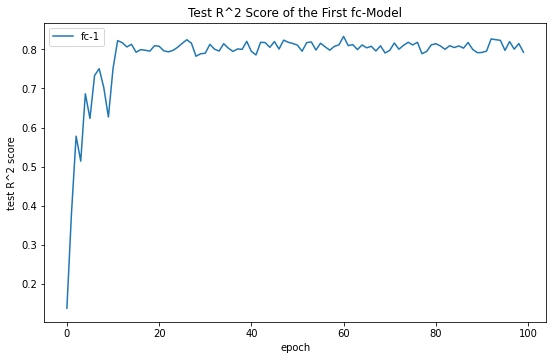

In [12]:
# Plotting the accuracy of the fully connected model:
sns.lineplot(x='epoch', y='test R^2 score', data=fc_1_results, label='fc-1')
plt.title('Test R^2 Score of the First fc-Model')
plt.gcf().set_size_inches(9, 5.5)
plt.show()

In [13]:
fc_1_results

,epoch,total time,train loss,test loss,train R^2 score,test R^2 score
0,0,3.721109,2.859313,1.215397,-1.063023,0.137908
1,1,4.901929,1.094033,0.874251,0.210780,0.382440
2,2,6.058201,1.031425,0.597725,0.256016,0.577927
3,3,7.214908,0.805898,0.686492,0.417772,0.514087
4,4,8.383694,0.648017,0.440781,0.533064,0.686434
...,...,...,...,...,...,...
95,95,117.198417,0.091468,0.286869,0.933687,0.797462
96,96,118.426120,0.097262,0.254210,0.929674,0.819958
97,97,119.656536,0.095504,0.282621,0.930977,0.800483
98,98,120.872530,0.098653,0.262305,0.928457,0.814925
